<a href="https://colab.research.google.com/github/vijaygwu/MathematicsOfML/blob/main/MultipleRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



1.   **Data Generation:** We generate synthetic data with three features, 𝑋, and create a linear relationship with a bit of added noise.
2.   **Model Definition:** We define a model with a single dense layer, which automatically learns the weights and bias for each feature.


3.   **Training Loop:** The model is trained using gradient descent, minimizing mean squared error.
4.   **Extracting Parameters:** After training, we extract the learned weights and bias and print them.


5.  **Plotting:** For simplicity, we plot the relationship between the first feature 𝑋[:,0] and the target 𝑦  to get a visual sense of the model's performance.












Epoch 0, Loss: 1.0561
Epoch 20, Loss: 0.0194
Epoch 40, Loss: 0.0124
Epoch 60, Loss: 0.0117
Epoch 80, Loss: 0.0116
Epoch 100, Loss: 0.0116
Epoch 120, Loss: 0.0116
Epoch 140, Loss: 0.0116
Epoch 160, Loss: 0.0116
Epoch 180, Loss: 0.0116
Trained weights: [ 3.0298162 -2.0149271  1.0533824]
Trained intercept (bias): 4.9823
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


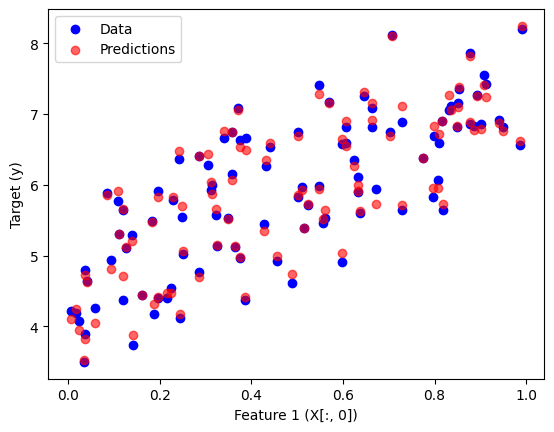

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Generate synthetic data
np.random.seed(42)
num_samples = 100
num_features = 3

# Randomly generate feature matrix X and true weights
X = np.random.rand(num_samples, num_features).astype(np.float32)
true_weights = np.array([3.0, -2.0, 1.0], dtype=np.float32)
true_bias = 5.0
noise = np.random.normal(0, 0.1, num_samples)

# Generate target variable y with noise
y = X @ true_weights + true_bias + noise

# Create a TensorFlow dataset
dataset = tf.data.Dataset.from_tensor_slices((X, y)).batch(10)

# Define the model
class MultipleRegressionModel(tf.keras.Model):
    def __init__(self):
        super().__init__()
        self.dense = tf.keras.layers.Dense(units=1)

    def call(self, inputs):
        return self.dense(inputs)

model = MultipleRegressionModel()

# Define loss and optimizer
loss_fn = tf.keras.losses.MeanSquaredError()
optimizer = tf.keras.optimizers.SGD(learning_rate=0.1)

# Training the model
num_epochs = 200
for epoch in range(num_epochs):
    for X_batch, y_batch in dataset:
        with tf.GradientTape() as tape:
            y_pred = model(X_batch)
            loss = loss_fn(y_batch, y_pred)

        gradients = tape.gradient(loss, model.trainable_variables)
        optimizer.apply_gradients(zip(gradients, model.trainable_variables))

    # Print the loss every 20 epochs
    if epoch % 20 == 0:
        print(f"Epoch {epoch}, Loss: {loss.numpy():.4f}")

# Extract trained parameters
w, b = model.dense.weights
print(f"Trained weights: {w.numpy().flatten()}")
print(f"Trained intercept (bias): {b.numpy()[0]:.4f}")

# Predicting and visualizing results for a 2D slice of data (for visualization purposes)
plt.scatter(X[:, 0], y, label="Data", color="blue")
plt.scatter(X[:, 0], model.predict(X), label="Predictions", color="red", alpha=0.6)
plt.xlabel("Feature 1 (X[:, 0])")
plt.ylabel("Target (y)")
plt.legend()
plt.show()
